In [18]:
# Applying Convolutional Neural Networks to MNIST dataset

import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

# tf.__version__  # Gives the verion of tensorflow
mnist = tf.keras.datasets.mnist  # 28x28 images of hand-written digits 0-9

In [19]:
# Dividing our data into train and test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [20]:
# Normalising our data
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

In [21]:
# Building the model
model = tf.keras.models.Sequential()  # Using the Sequential model
model.add(tf.keras.layers.Flatten())  # Convolutionary neural network flattening (Input Layer)
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # Output layer

In [22]:
# Defining parameter for training our model
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [23]:
# Fitting our model
model.fit(X_train, y_train, epochs = 3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2588 - accuracy: 0.9236
Epoch 2/3
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1043 - accuracy: 0.9683
Epoch 3/3
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0710 - accuracy: 0.9779


In [24]:
val_loss, val_acc = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 28us/sample - loss: 0.0897 - accuracy: 0.9717


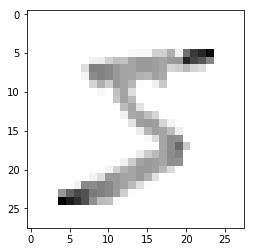

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [25]:
# Plotting our dataset
import matplotlib.pyplot  as plt
plt.imshow(X_train[0], cmap = plt.cm.binary)  # Showing our data
plt.show()
print(X_train[0])  # Printing the X_train values (Scaled between 0 and 1 after normalisation)

In [26]:
# Saving our model
model.save('epic_num_reader.model')

In [27]:
# Loading our saved model
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [28]:
predictions = new_model.predict([X_test])  # Prediction always takes a list

In [29]:
print(predictions)  # Making Predictions

[[1.65087339e-08 6.85984780e-09 6.66064489e-06 ... 9.99984860e-01
  2.98203915e-08 5.12315012e-07]
 [6.76298884e-09 7.19788804e-05 9.99924660e-01 ... 7.43897566e-09
  3.49126594e-07 7.66743891e-11]
 [9.47497483e-07 9.99479830e-01 2.23219176e-05 ... 3.78245051e-04
  5.48481948e-05 1.28802831e-05]
 ...
 [1.51538835e-08 7.47568492e-07 1.31798412e-08 ... 8.33013546e-05
  6.10661061e-07 4.45714424e-04]
 [1.99347468e-07 3.10229382e-07 1.46841927e-07 ... 9.62399099e-07
  4.27708699e-04 1.79549897e-09]
 [2.62931735e-06 1.05730065e-08 1.94193547e-07 ... 8.10073449e-12
  6.01908354e-08 4.92409402e-09]]


In [30]:
# Checking our result for 1 number of X_test
import numpy as np

print(np.argmax(predictions[0]))

7


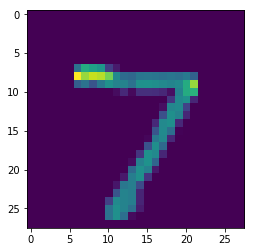

In [31]:
# Checking our results
plt.imshow(X_test[0])
plt.show()

In [32]:
# Evaluating our model performance
score = model.evaluate(X_test, y_test, verbose=0) 
print('loss=', score[0]) 
print('accuracy=', score[1]) 

loss= 0.08969039426976814
accuracy= 0.9717
